In [ ]:
#!pip install tensorflow opencv-python matplotlib

In [15]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data_dir = 'data' 

In [17]:
import cv2
import imghdr

In [18]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [19]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [20]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 7023 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

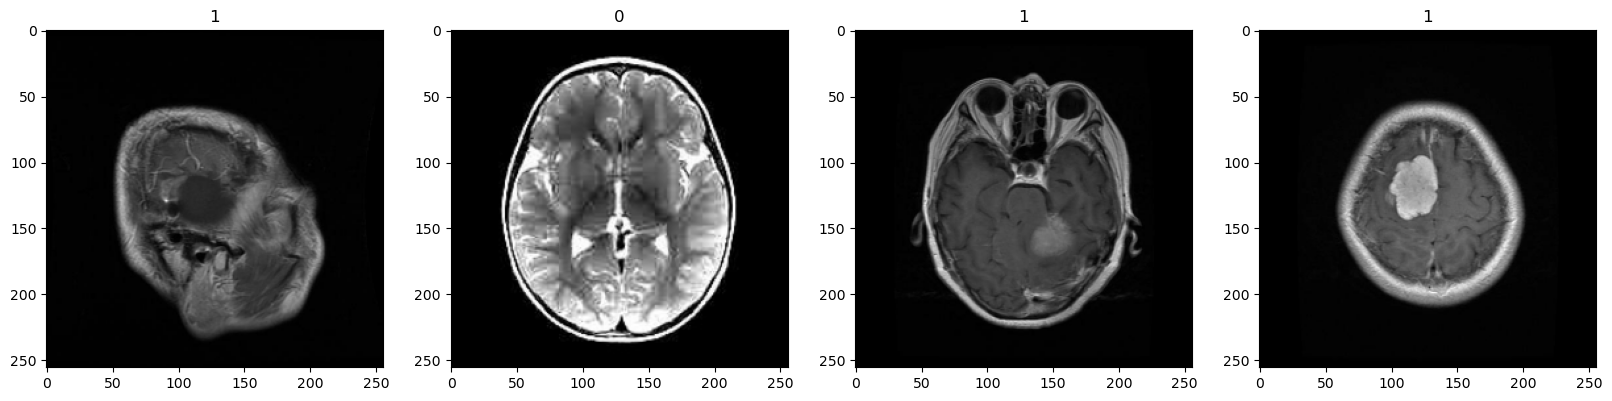

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [25]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.00196078, 0.00196078, 0.00196078],
          [0.00196078, 0.00196078, 0.00196078],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00098039, 0.00098039, 0.00098039],
          [0.        , 0.        , 0.        ]],
 
         [[0.00686275, 0.00686275, 0.00686275],
          [0.01078431, 0.01078431, 0.01078431],
          [0.01078431, 0.01078431, 0.01078431],
          ...,
          [0.00882353, 0.00882353, 0.00882353],
          [0.00588235, 0.00588235, 0.00588235],
          [0.00294118, 0.00294118, 0.00294118]],
 
         [[0.00882353, 0.00882353, 0.00882353],
          [0.0127451 , 0.0127451 , 0.0127451 ],
          [0.0127451 , 0.0127451 , 0.0127451 ],
          ...,
          [0.01470588, 0.01470588, 0.01470588],
          [0.01176471, 0.01176471, 0.01176471],
          [0.00980392, 0.00980392, 0.00980392]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
train_size

154

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\SHARMILA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 69s 410ms/step - accuracy: 0.8672 - loss: 0.3518 - val_accuracy: 0.9482 - val_loss: 0.1363
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 62s 403ms/step - accuracy: 0.9605 - loss: 0.1184 - val_accuracy: 0.9773 - val_loss: 0.0774
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 64s 414ms/step - accuracy: 0.9790 - loss: 0.0618 - val_accuracy: 0.9801 - val_loss: 0.0626
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 64s 410ms/step - accuracy: 0.9902 - loss: 0.0280 - val_accuracy: 0.9744 - val_loss: 0.0687
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 58s 376ms/step - accuracy: 0.9939 - loss: 0.0223 - val_accuracy: 0.9886 - val_loss: 0.0489
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 65s 420ms/step - accuracy: 0.9970 - loss: 0.0115 - val_accuracy: 0.9886 - val_loss: 0.0477
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 65s 418ms/step - accuracy: 0.9976 - loss: 0.0085 - val_accuracy: 0.9872 - val_loss: 0.0506
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 66s 429ms/step - accuracy: 0.9981 - loss: 0

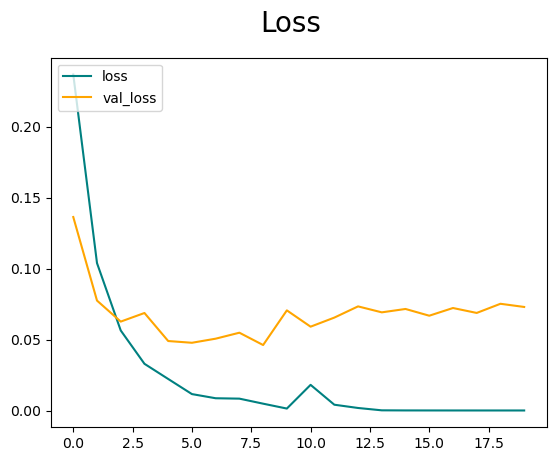

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

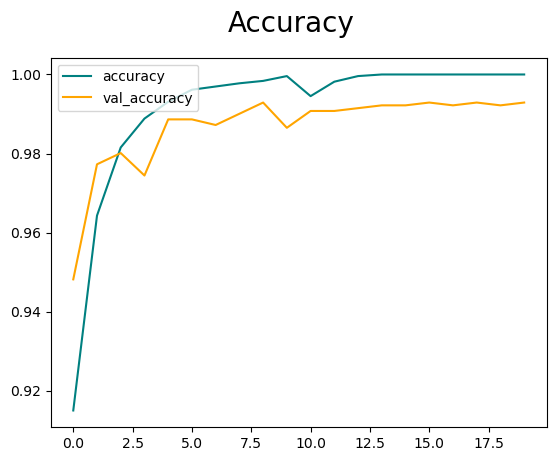

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9896907, shape=(), dtype=float32) tf.Tensor(0.9958506, shape=(), dtype=float32) tf.Tensor(0.98981076, shape=(), dtype=float32)


In [43]:
import cv2

## Upload your local file here

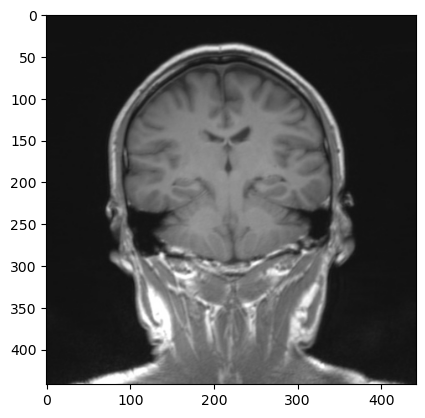

In [74]:
img = cv2.imread('img_for_eval_model/normal1.jpeg')
plt.imshow(img)
plt.show()

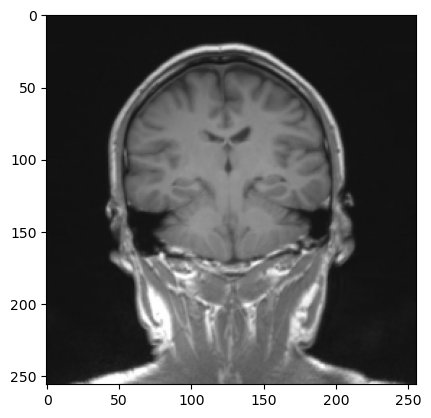

In [75]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [76]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [77]:
yhat

array([[0.0001819]], dtype=float32)

In [78]:
if yhat > 0.5: 
    print(f'Brain Tumor Detected')
else:
    print(f'No Brain Tumor Detected')

No Brain Tumor Detected


In [49]:
from tensorflow.keras.models import load_model

In [101]:
model.save(os.path.join('brain_tumor_model.h5'))

In [51]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [79]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.0001819]], dtype=float32)